To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Minimum Spanning Tree Problem

In this tutorial, we will use the Python library "GraphUtilitiesPython" to generate graphs.

In [2]:
import sys
#sys.path.append("<InstallPath>\GraphUtilitiesPython")
#To avoid character encoding issues:
#for example, you can use "\U" instead of "U"
#or simply replace all "\" by "\\"
#for example,
sys.path.append("C:\\Users\\user\\GraphUtilitiesPython")

In [3]:
import numpy as np
from graphutilitiespy import Drawing
from graphutilitiespy import Graphs

The Python library "NetworkX" is required to solve the minimum spanning tree problem. 

In [4]:
import networkx as nx

The Python library "Matplotlib" is used to visualize data.

In [5]:
import matplotlib.pyplot as plt

# Problem 01

A cobot (collaborative robot) crane is designed to work with human workers in close proximity. The cobot's task is to provide semi-automatic transportation of semi-finished products between certain positions in the workstations. The motors of the cobot crane have the same speed limit. The workers will load and unload the cobot crane at the given positions of the workstations. In order to ensure the safety of the workers and to avoid restricting the workers' working space and time, the cobot must move as quickly as possible on a fixed minimal line between the positions at the workstations.

| Position no | (x,y) |
| :---------: | :------------: |
| 0 | 12, 18 |
| 1 | 15, 94 |
| 2 | 31, 35 |
| 3 | 34, 83 |
| 4 | 47, 61 |
| 5 | 53, 76 |
| 6 | 64, 20 |
| 7 | 77, 44 |
| 8 | 89, 63 |
| 9 | 94, 15 |


Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [6]:
vertices = np.array([[12, 18],
                     [15, 94],
                     [31, 35],
                     [34, 83],
                     [47, 61],
                     [53, 76],
                     [64, 20],
                     [77, 44],
                     [89, 63],
                     [94, 15]])
nodepos = vertices

In [7]:
distancetype = 'Chebyshev'
drawnodes = True
writeedgelabels = False

Chebyshev distance selected..

Creating a complete simple graph..

Drawing a complete simple graph..



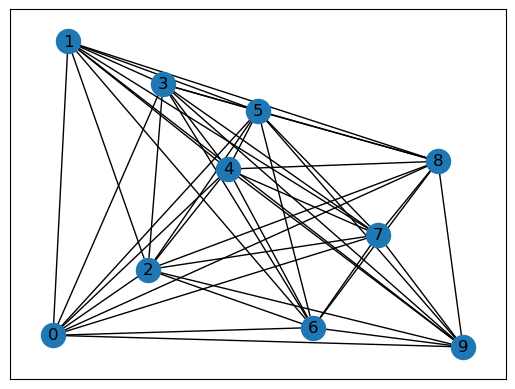

In [8]:
G1 = Drawing.draw_completesimplegraph(vertices, nodepos, distancetype, drawnodes, writeedgelabels)

To get information on the graph "G1":

In [9]:
print(G1)

Graph with 10 nodes and 45 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [10]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	76.0
  (0, 2)	19.0
  (0, 3)	65.0
  (0, 4)	43.0
  (0, 5)	58.0
  (0, 6)	52.0
  (0, 7)	65.0
  (0, 8)	77.0
  (0, 9)	82.0
  (1, 0)	76.0
  (1, 2)	59.0
  (1, 3)	19.0
  (1, 4)	33.0
  (1, 5)	38.0
  (1, 6)	74.0
  (1, 7)	62.0
  (1, 8)	74.0
  (1, 9)	79.0
  (2, 0)	19.0
  (2, 1)	59.0
  (2, 3)	48.0
  (2, 4)	26.0
  (2, 5)	41.0
  (2, 6)	33.0
  (2, 7)	46.0
  :	:
  (7, 2)	46.0
  (7, 3)	43.0
  (7, 4)	30.0
  (7, 5)	32.0
  (7, 6)	24.0
  (7, 8)	19.0
  (7, 9)	29.0
  (8, 0)	77.0
  (8, 1)	74.0
  (8, 2)	58.0
  (8, 3)	55.0
  (8, 4)	42.0
  (8, 5)	36.0
  (8, 6)	43.0
  (8, 7)	19.0
  (8, 9)	48.0
  (9, 0)	82.0
  (9, 1)	79.0
  (9, 2)	63.0
  (9, 3)	68.0
  (9, 4)	47.0
  (9, 5)	61.0
  (9, 6)	30.0
  (9, 7)	29.0
  (9, 8)	48.0


To have the adjacency matrix of the graph "G1" in dense form:

In [11]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[ 0. 76. 19. 65. 43. 58. 52. 65. 77. 82.]
 [76.  0. 59. 19. 33. 38. 74. 62. 74. 79.]
 [19. 59.  0. 48. 26. 41. 33. 46. 58. 63.]
 [65. 19. 48.  0. 22. 19. 63. 43. 55. 68.]
 [43. 33. 26. 22.  0. 15. 41. 30. 42. 47.]
 [58. 38. 41. 19. 15.  0. 56. 32. 36. 61.]
 [52. 74. 33. 63. 41. 56.  0. 24. 43. 30.]
 [65. 62. 46. 43. 30. 32. 24.  0. 19. 29.]
 [77. 74. 58. 55. 42. 36. 43. 19.  0. 48.]
 [82. 79. 63. 68. 47. 61. 30. 29. 48.  0.]]


In [12]:
mst = nx.minimum_spanning_tree(G1, weight='weight')

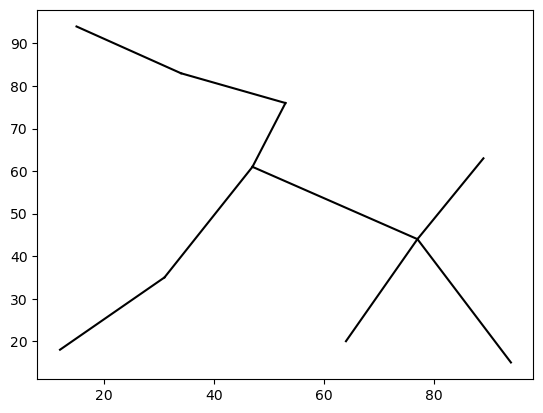

In [13]:
for l in mst.edges:
    fromnode = l[0]
    tonode = l[1]
    xs = (nodepos[fromnode][0],nodepos[tonode][0])
    ys = (nodepos[fromnode][1],nodepos[tonode][1])
    line = [xs,ys]
    plt.plot(*line, color="black")